In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [10]:
#데이터셋을 로드


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]



array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [16]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [17]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [23]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
'TAX', 'PTRATIO', 'B', 'LSTAT']
feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [24]:
boston_df = pd.DataFrame(data, columns=feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [26]:

boston_df["PRICE"] = target
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:

#데이터의 크기와 형태를 확인
boston_df.shape


(506, 14)

In [28]:
# 데이터프레임 정보
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [29]:

boston_df.drop(["CHAS"], axis=1, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
boston_df.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

CRIM
ZN
INDUS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


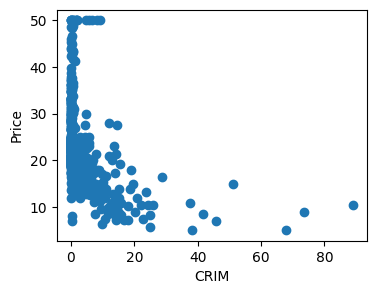

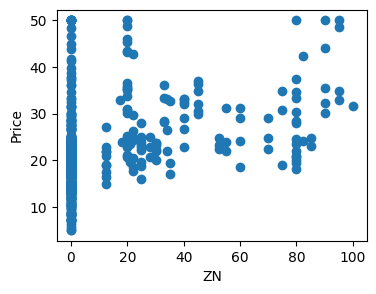

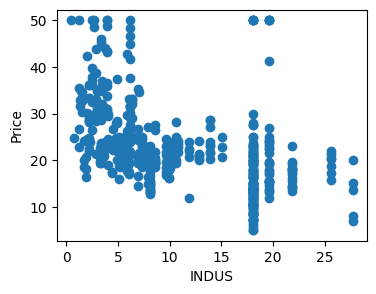

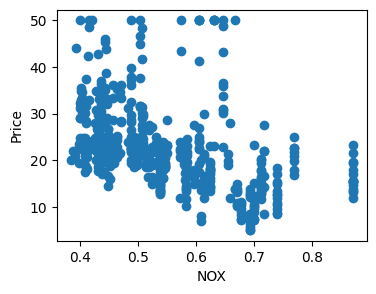

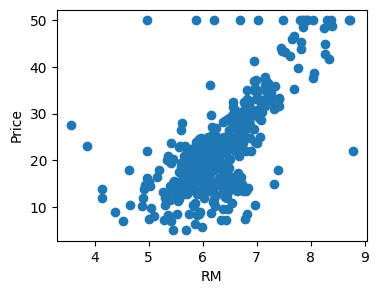

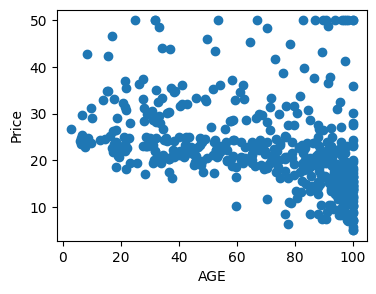

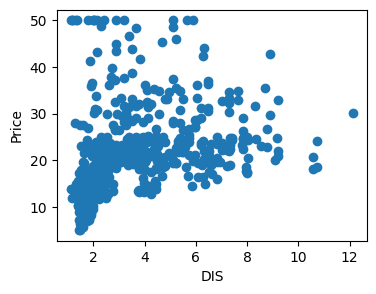

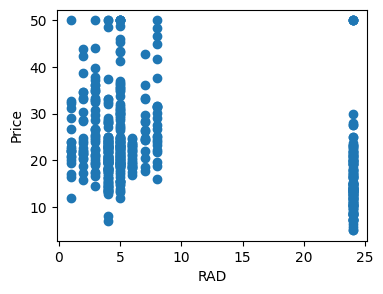

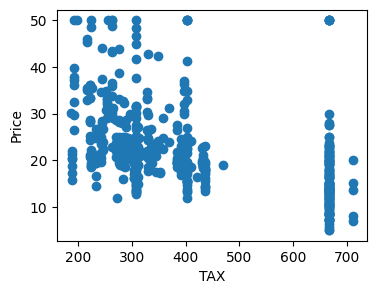

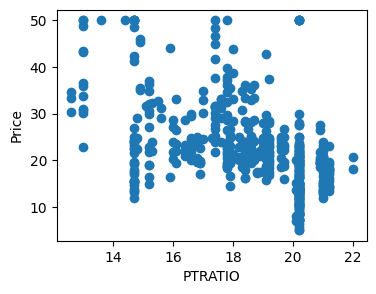

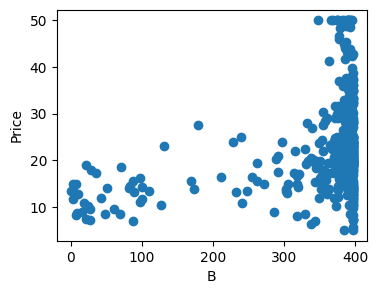

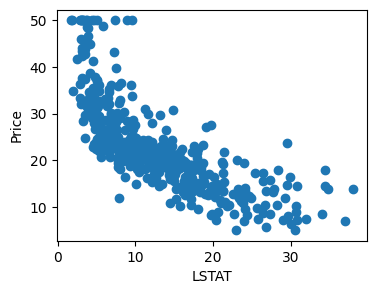

In [35]:
for col in boston_df.columns[:-1]:
    print(col)
    plt.figure(figsize=(4,3))
    plt.scatter(boston_df[col], boston_df["PRICE"])
    plt.xlabel(col)
    plt.ylabel('Price')


In [39]:
boston_df.columns
#모든 컬럼명 

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [38]:
boston_df.columns[:-1]
#맨 끝 컬럼 제외한 모든 컬럼명

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

row: 0 col: 0
row: 0 col: 1
row: 0 col: 2
row: 0 col: 3
row: 1 col: 0
row: 1 col: 1
row: 1 col: 2
row: 1 col: 3
row: 2 col: 0
row: 2 col: 1
row: 2 col: 2
row: 2 col: 3


"\n#enumerate \ni = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] #인덱스 0부터 12까지\nrow = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2] #인덱스 i를 4로 나눈 몫\ncol = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3] #인덱스 i를 4로 나눈 나머지\nfeature = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']\n"

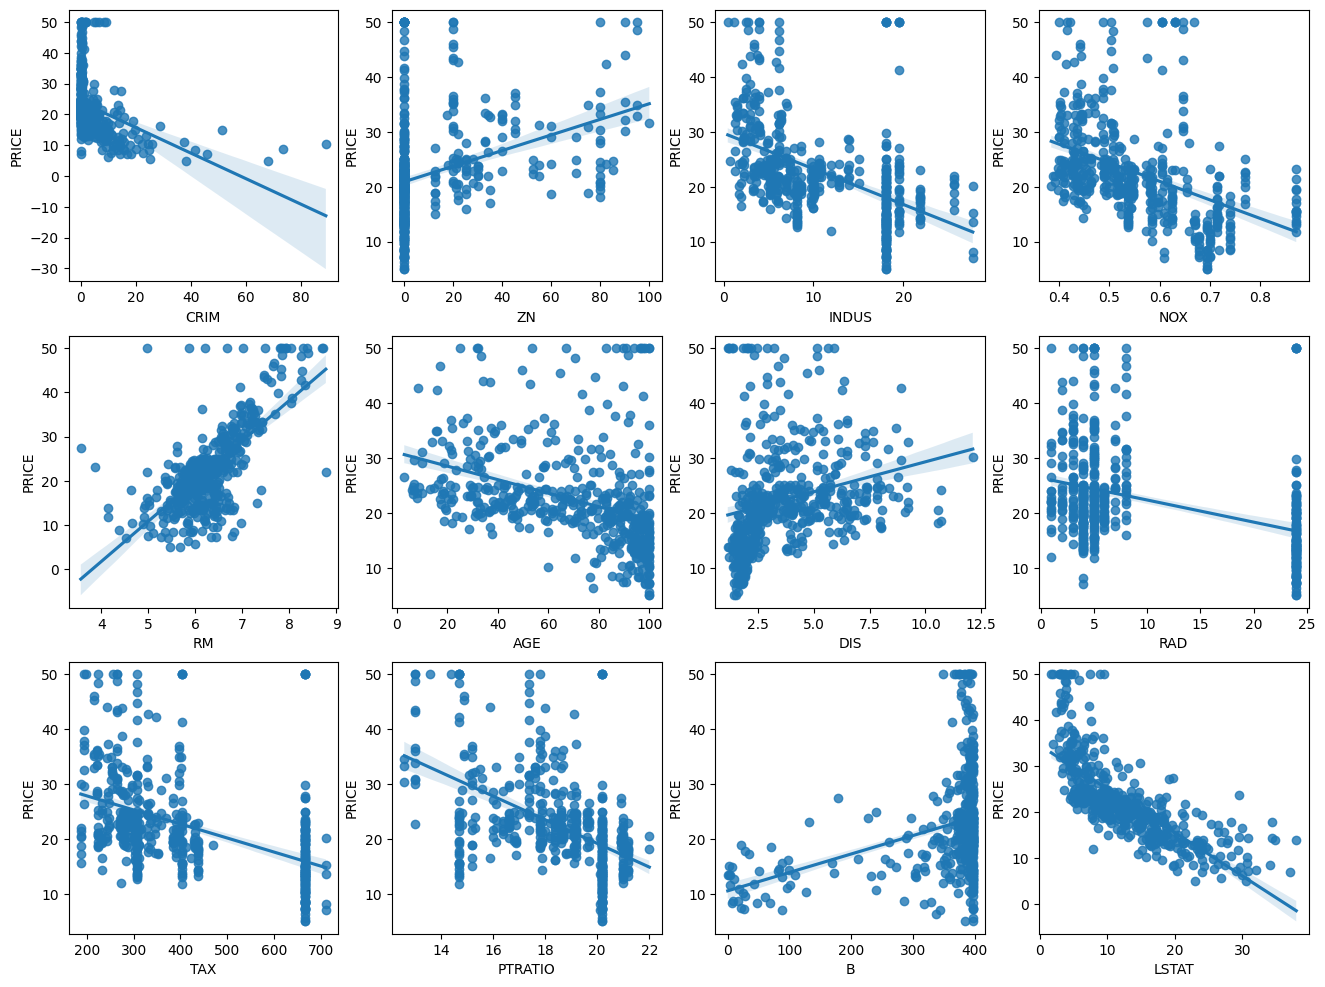

In [43]:
# 각각의 독립변수와 종속변수간의 관계(12장)를 3행 4열의 subplot으로 그려본다.
import matplotlib.pyplot as plt
import seaborn as sns

# subplot캔버스를 준비한다
fig, ax =plt.subplots(figsize=(16, 12), nrows=3, ncols=4)

for i, feature in enumerate(boston_df.columns[:-1]):
    row = int(i/4)
    col = i % 4   #i를 4로 나눈 나머지
    print("row: {} col: {}".format(row, col))
    sns.regplot(x=feature, y="PRICE", data=boston_df, ax=ax[row][col])

'''
#enumerate 
i = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] #인덱스 0부터 12까지
row = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2] #인덱스 i를 4로 나눈 몫
col = [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3] #인덱스 i를 4로 나눈 나머지
feature = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
'''

In [44]:
boston_df.CRIM

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

# 컬럼 별로 독립변수간의 상관관계 시각화  
(다중공선성이 의심되는 독립변수들)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


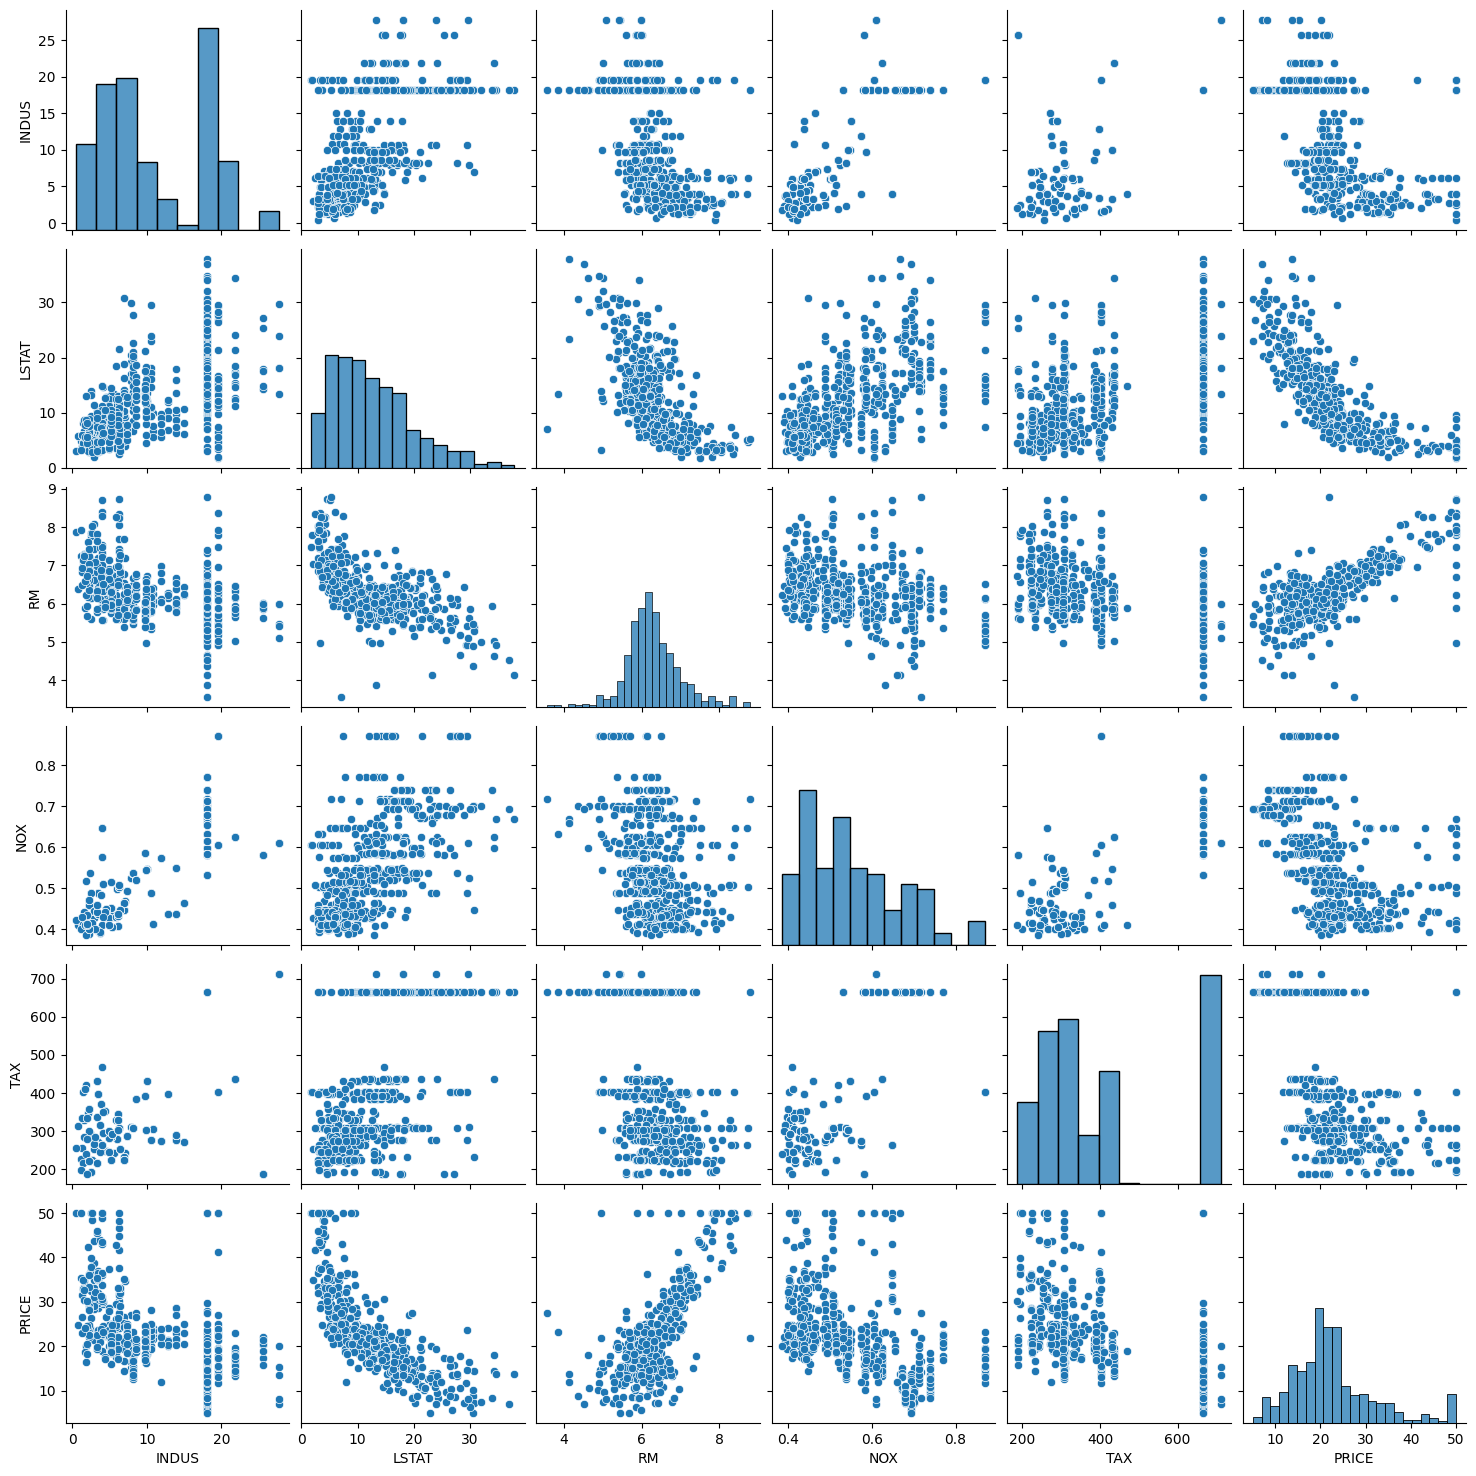

In [45]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화(4개만)
# heatmap()
ccol =["INDUS", "LSTAT", "RM","NOX", "TAX", "PRICE"]
sns.pairplot(boston_df[ccol])


In [46]:
corr_df = boston_df[ccol].corr()
corr_df


,INDUS,LSTAT,RM,NOX,TAX,PRICE
INDUS,1.000000,0.603800,-0.391676,0.763651,0.720760,-0.483725
LSTAT,0.603800,1.000000,-0.613808,0.590879,0.543993,-0.737663
RM,-0.391676,-0.613808,1.000000,-0.302188,-0.292048,0.695360
NOX,0.763651,0.590879,-0.302188,1.000000,0.668023,-0.427321
TAX,0.720760,0.543993,-0.292048,0.668023,1.000000,-0.468536
PRICE,-0.483725,-0.737663,0.695360,-0.427321,-0.468536,1.000000


<Axes: >

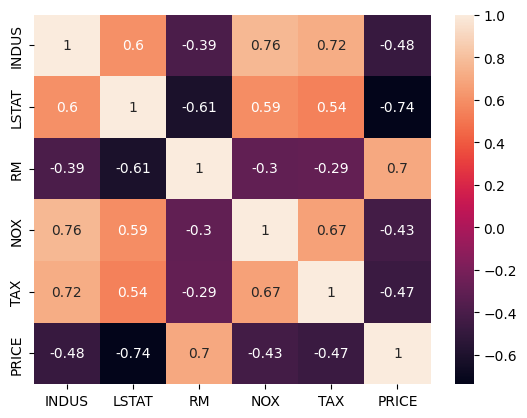

In [47]:
sns.heatmap(corr_df, annot=True)

# annot 각 셀의 값 표기 유무

# 보스턴 집값 다중선형회귀 분석(사이킷런)

In [48]:
boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:

from sklearn.model_selection import train_test_split
X = boston_df.drop(['PRICE'], axis=1)
y = boston_df.PRICE


In [52]:
#X_train 데이터 일부 확인
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [53]:
X_train.head()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
61,0.17171,25.0,5.13,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
377,9.82349,0.0,18.10,0.671,6.794,98.8,1.3580,24.0,666.0,20.2,396.90,21.24
39,0.02763,75.0,2.95,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
365,4.55587,0.0,18.10,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12


# 모델 클래스 선택

In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [56]:
# 과학적 표기법 대신 소수점 6자리까지 나타낸다.
np.set_printoptions(precision=6, suppress=True)


In [57]:
#학습 수행
reg.fit(X_train, y_train)
print(reg.coef_, reg.intercept_)

y_pred = reg.predict(X_test)
print(y_pred[:5])
print(X_test[:5])

[ -0.105186   0.062797   0.070891 -20.795385   2.876737   0.004881
  -1.551348   0.336771  -0.013175  -1.023527   0.006811  -0.575544] 46.42007307040359
[32.903656 28.085384 17.981247 21.550709 19.296281]
        CRIM    ZN  INDUS    NOX     RM   AGE     DIS   RAD    TAX  PTRATIO  \
307  0.04932  33.0   2.18  0.472  6.849  70.3  3.1827   7.0  222.0     18.4   
343  0.02543  55.0   3.78  0.484  6.696  56.4  5.7321   5.0  370.0     17.6   
47   0.22927   0.0   6.91  0.448  6.030  85.5  5.6894   3.0  233.0     17.9   
67   0.05789  12.5   6.07  0.409  5.878  21.4  6.4980   4.0  345.0     18.9   
362  3.67822   0.0  18.10  0.770  5.362  96.2  2.1036  24.0  666.0     20.2   

          B  LSTAT  
307  396.90   7.53  
343  396.90   7.18  
47   392.74  18.80  
67   396.21   8.10  
362  380.79  10.19  


In [58]:
boston_df.loc[173]

CRIM         0.09178
ZN           0.00000
INDUS        4.05000
NOX          0.51000
RM           6.41600
AGE         84.10000
DIS          2.64630
RAD          5.00000
TAX        296.00000
PTRATIO     16.60000
B          395.50000
LSTAT        9.04000
PRICE       23.60000
Name: 173, dtype: float64

In [61]:
def print_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("MSE: {:.3f}".format(mse))
    print("RMSE: {:.3f}".format(rmse))
    print("R2 Score: {:.3f}".format(r2))
    return


In [63]:
from sklearn.metrics import mean_squared_error, r2_score
# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse, rmse, r2)
print('--'*50)
print_score(y_test, y_pred)

20.116803308501396 4.485175950673663 0.7805148013521948
----------------------------------------------------------------------------------------------------
MSE: 20.117
RMSE: 4.485
R2 Score: 0.781


In [64]:
# 수정된 결정 계수 확인(Ajusted-R2)
#데이터의 크기
n = len(X_train)
print("n=", n)
#독립변수의 갯수
k = len(X_train.columns)
print("k=", k)
# 수정된 결정 계수
adj_r2 = 1 - ((1-r2) * (n -1)) / (n-k-1)
print("adj_r2: ", adj_r2)


n= 354
k= 12
adj_r2:  0.7727909820449406


In [65]:
np.set_printoptions(suppress=True)
print("intercept: {:.3f}".format(reg.intercept_))
print("회귀 계수: ", np.round(reg.coef_, 3))
#np.set_printoptions(suppress=False)

intercept: 46.420
회귀 계수:  [ -0.105   0.063   0.071 -20.795   2.877   0.005  -1.551   0.337  -0.013
  -1.024   0.007  -0.576]


In [66]:

np.set_printoptions(suppress=False)
print("회귀 계수: ", np.round(reg.coef_, 3))


회귀 계수:  [-1.0500e-01  6.3000e-02  7.1000e-02 -2.0795e+01  2.8770e+00  5.0000e-03
 -1.5510e+00  3.3700e-01 -1.3000e-02 -1.0240e+00  7.0000e-03 -5.7600e-01]


In [68]:
#회귀 모델에서 구한 회귀 계수와 피처 이름을 묶어
#시리즈 자료형으로 만듦
coef = pd.Series(data= np.round(reg.coef_, 3), index=X.columns)
coef_sorted = coef.sort_values(ascending=False)
coef_sorted
# 회귀식을 만듦
print('y = ' + str(reg.intercept_))
for i, c in zip(coef.index, coef.values):
    print('+ (' + str(c) + ')* ' + str(i) )

y = 46.42007307040359
+ (-0.105)* CRIM
+ (0.063)* ZN
+ (0.071)* INDUS
+ (-20.795)* NOX
+ (2.877)* RM
+ (0.005)* AGE
+ (-1.551)* DIS
+ (0.337)* RAD
+ (-0.013)* TAX
+ (-1.024)* PTRATIO
+ (0.007)* B
+ (-0.576)* LSTAT


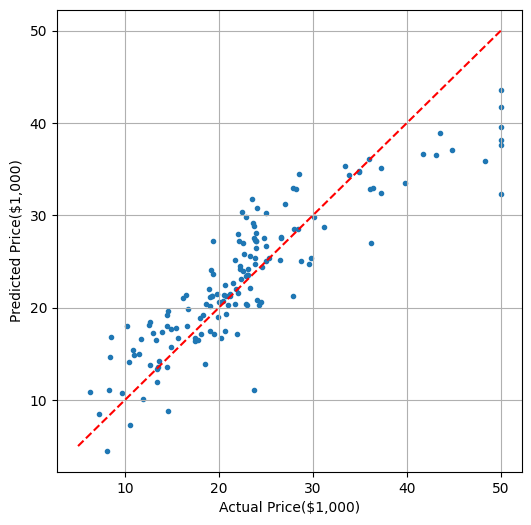

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 6))
plt.scatter(y_test, y_pred, s = 9)
plt.xlabel('Actual Price($1,000)')
plt.ylabel('Predicted Price($1,000)')
plt.plot([5,50], [5, 50], c= 'r', ls="--")
plt.grid();

(array([11., 33., 41., 31., 18.,  9.,  3.,  4.,  1.,  1.]),
 array([-8.3114  , -5.708896, -3.106392, -0.503889,  2.098615,  4.701119,
         7.303622,  9.906126, 12.50863 , 15.111133, 17.713637]),
 <BarContainer object of 10 artists>)

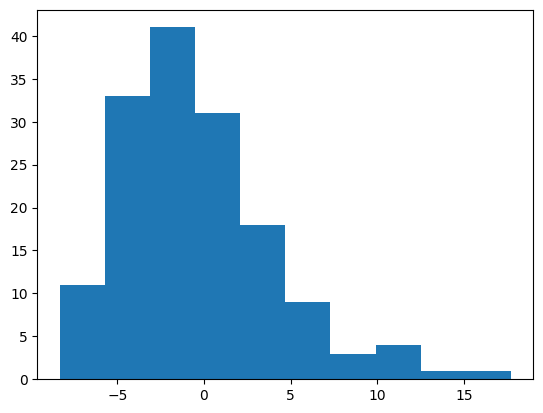

In [71]:

plt.hist(y_test - y_pred)

<Axes: xlabel='PRICE', ylabel='Count'>

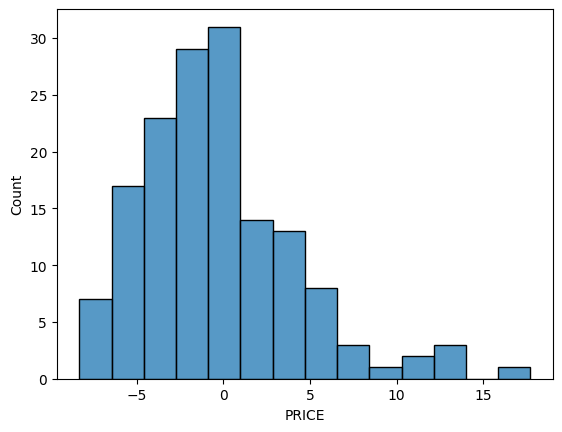

In [72]:

sns.histplot(y_test - y_pred)
